In [1]:
import hdbscan
import pandas as pd
import numpy as np
#%matplotlib ipympl
#%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from ipywidgets import interact, Output
from IPython.display import clear_output

import sys
sys.path.append('..')
from src.band_plotters import DATA_DIRECTORY
from src.cluster_plotters import plot_cluster_ellipses, plot_groups

In [2]:
FINGERPRINT_NAME = "max_bands_encoder"
FINGERPRINT_LENGTH = 3584
PERPLEXITY = 50
FLAT_ONLY = True
BORING_COLUMNS = ["segments", "flat_segments", "flatness_score", "binary_flatness", "horz_flat_seg", "exfoliation_eg", "band_gap", "A", "B", "C", "D", "E", "F"]
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

## Load Data

In [3]:
df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")
if FLAT_ONLY:
    df = df[df.horz_flat_seg>0]
df.head()

C:\Users\hkpen\AppData\Local\Temp\ipykernel_12036\2211423145.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")


,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,3576,3577,3578,3579,3580,3581,3582,3583,fx,fy
ID,,,,,,,,,,,,,,,,,,,,,
2dm-3,TlS,AB,2,4,4,0.84646,bottom-up,1,3,0.095794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.469423,50.144436
2dm-21,TaI3,AB3,162,3,3,0.88201,bottom-up,1,1,0.097255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.918354,17.757679
2dm-22,Li2O,AB2,164,3,3,0.96678,bottom-up,1,4,0.037593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.399750,54.253536
2dm-25,VBr4,AB4,123,3,3,0.97834,bottom-up,1,2,0.140290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.544128,-30.915100
2dm-29,SBr,AB,2,4,4,0.82037,bottom-up,1,3,0.067035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31.617424,14.813807


## Cluster

In [4]:
fingerprint_cols = [str(i) for i in range(FINGERPRINT_LENGTH)]
BORING_COLUMNS += fingerprint_cols

In [18]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=3, p=0.2)
clusterer.fit(df[fingerprint_cols])

df["labels"] = clusterer.labels_


In [19]:
def view_cluster(label):
    display(df[df.labels==label].drop(BORING_COLUMNS, axis=1).head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        #ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols])
        # plot version with some print from cluster 0 subtracted, to better visualise the fingerprint differences
        ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols]-np.array(df[df.labels==1][fingerprint_cols])[0])
        ax[i].set_xlabel(index)
    

interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

interactive(children=(IntSlider(value=35, description='label', max=72, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

## Rerun TSNE (ONLY IF ON FLAT SUBSET)

In [13]:
if FLAT_ONLY:
    tsne = manifold.TSNE(n_components=2, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=25 ,n_iter=10000, verbose=2)
    fingerprint_2d = tsne.fit_transform(df[fingerprint_cols])
    df.fx, df.fy = fingerprint_2d[:, 0], fingerprint_2d[:, 1]

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 2005 samples in 0.052s...
[t-SNE] Computed neighbors for 2005 samples in 0.556s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2005
[t-SNE] Computed conditional probabilities for sample 2000 / 2005
[t-SNE] Computed conditional probabilities for sample 2005 / 2005
[t-SNE] Mean sigma: 0.039503
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 72.8148499, gradient norm = 0.0125225 (50 iterations in 0.480s)
[t-SNE] Iteration 100: error = 71.7138519, gradient norm = 0.0001633 (50 iterations in 0.388s)
[t-SNE] Iteration 150: error = 71.7091827, gradient norm = 0.0000622 (50 iterations in 0.349s)
[t-SNE] Iteration 200: error = 71.7091599, gradient norm = 0.0000532 (50 iterations in 0.361s)
[t-SNE] Iteration 250: error = 71.7093964, gradient norm = 0.0000437 (50 iterations in 0.391s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.709396
[t-SNE] Iteration 300: erro

[t-SNE] Iteration 4150: error = 1.0221119, gradient norm = 0.0002995 (50 iterations in 0.457s)
[t-SNE] Iteration 4200: error = 1.0220875, gradient norm = 0.0002809 (50 iterations in 0.503s)
[t-SNE] Iteration 4250: error = 1.0220298, gradient norm = 0.0001654 (50 iterations in 0.499s)
[t-SNE] Iteration 4300: error = 1.0219672, gradient norm = 0.0002748 (50 iterations in 0.485s)
[t-SNE] Iteration 4350: error = 1.0218873, gradient norm = 0.0002186 (50 iterations in 0.469s)
[t-SNE] Iteration 4400: error = 1.0218502, gradient norm = 0.0001817 (50 iterations in 0.480s)
[t-SNE] Iteration 4450: error = 1.0218381, gradient norm = 0.0002890 (50 iterations in 0.478s)
[t-SNE] Iteration 4500: error = 1.0217836, gradient norm = 0.0002483 (50 iterations in 0.476s)
[t-SNE] Iteration 4550: error = 1.0217038, gradient norm = 0.0001970 (50 iterations in 0.497s)
[t-SNE] Iteration 4600: error = 1.0216002, gradient norm = 0.0001988 (50 iterations in 0.488s)
[t-SNE] Iteration 4650: error = 1.0215936, gradien

[t-SNE] Iteration 8500: error = 1.0199602, gradient norm = 0.0001124 (50 iterations in 0.525s)
[t-SNE] Iteration 8550: error = 1.0199372, gradient norm = 0.0002009 (50 iterations in 0.634s)
[t-SNE] Iteration 8600: error = 1.0199566, gradient norm = 0.0001328 (50 iterations in 0.663s)
[t-SNE] Iteration 8650: error = 1.0198947, gradient norm = 0.0001781 (50 iterations in 0.637s)
[t-SNE] Iteration 8700: error = 1.0199226, gradient norm = 0.0002667 (50 iterations in 0.625s)
[t-SNE] Iteration 8750: error = 1.0199234, gradient norm = 0.0001032 (50 iterations in 0.517s)
[t-SNE] Iteration 8800: error = 1.0199298, gradient norm = 0.0001542 (50 iterations in 0.499s)
[t-SNE] Iteration 8850: error = 1.0198919, gradient norm = 0.0001524 (50 iterations in 0.538s)
[t-SNE] Iteration 8900: error = 1.0198503, gradient norm = 0.0001267 (50 iterations in 0.571s)
[t-SNE] Iteration 8950: error = 1.0198170, gradient norm = 0.0001996 (50 iterations in 0.504s)
[t-SNE] Iteration 9000: error = 1.0197921, gradien

## Plots

C:\Users\hkpen\AppData\Local\Temp\ipykernel_12036\3628650646.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


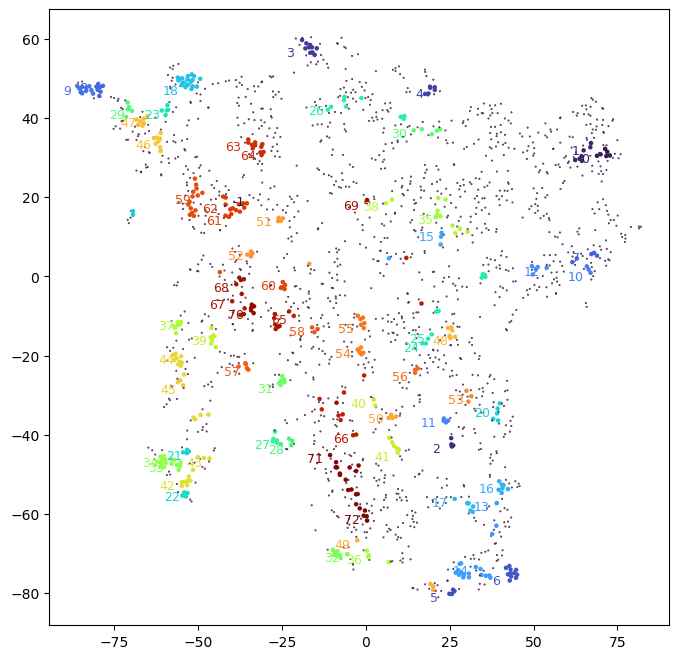

In [20]:
labels = clusterer.labels_

fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2
 
unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
        col=cmap(norm(labels[rep_id]))
        plt.annotate(labels[rep_id],fingerprint_2d[rep_id,:]+[-4.5,-1],color=col,alpha=1, weight='normal', ha='center', va='center', size=9).draggable()

plt.scatter(fingerprint_2d[:,0], fingerprint_2d[:,1],s=size, c=labels*5, cmap="turbo")
plt.show()

Output()

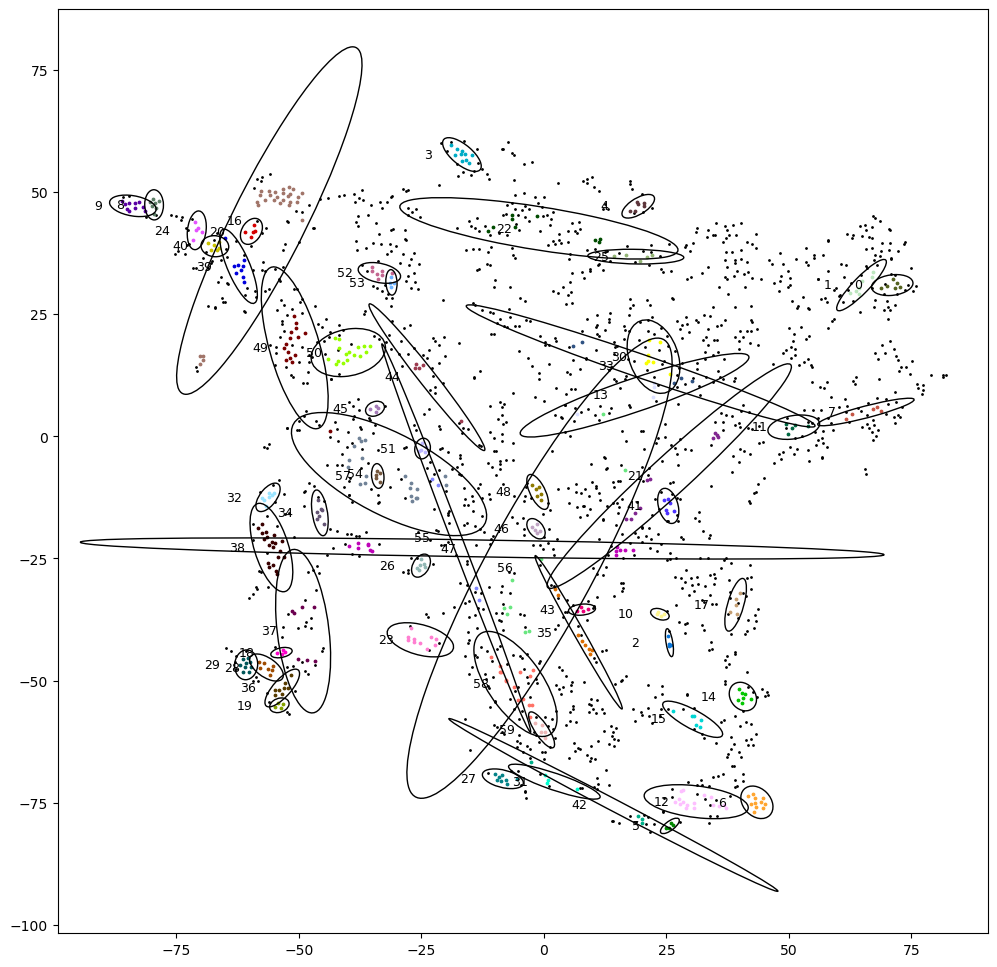

In [17]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(12, 12))
ax = plot_groups(df,"labels", ax=ax)
ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Output()

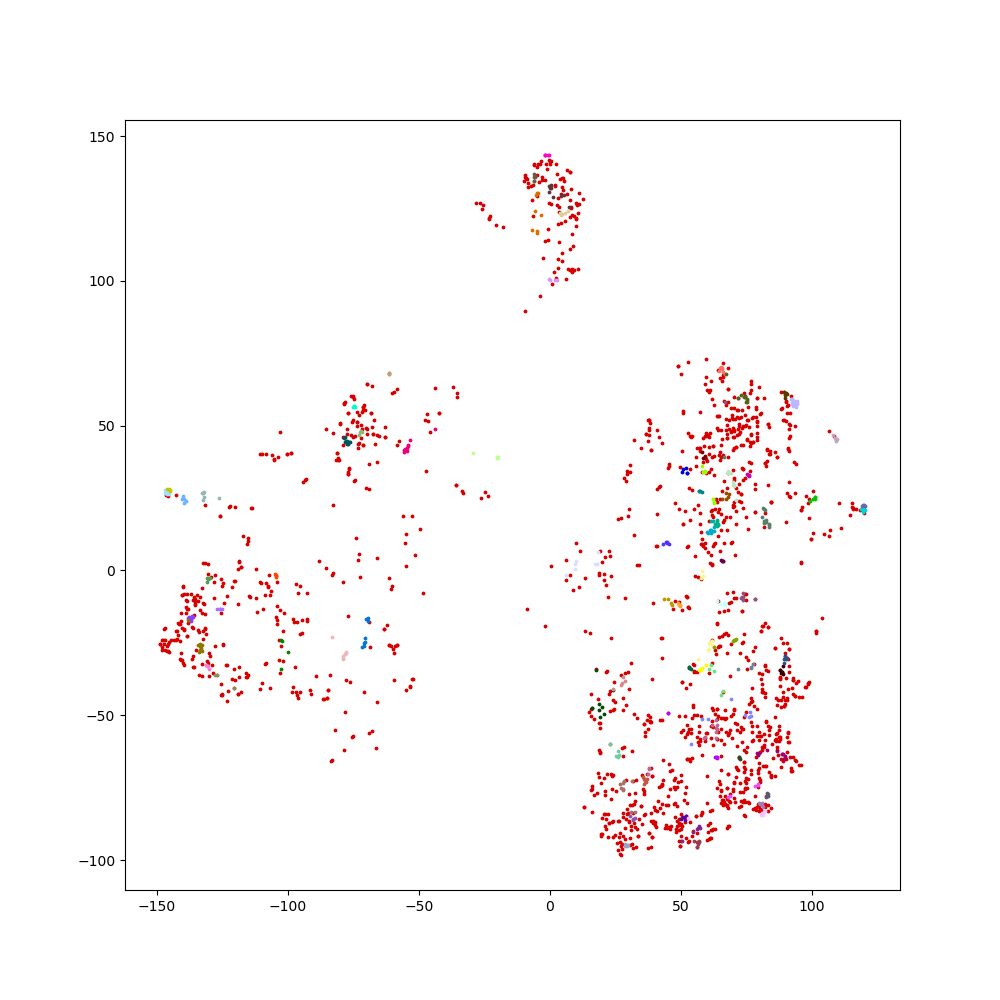

In [12]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_groups(df,"labels", ax=ax)
#ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()